In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [37]:
df = pd.read_csv('D:/MyWorks/Data analyst/Data Training/fcc-forum-pageviews.csv', parse_dates=['date'])

In [38]:
df.shape

(1304, 2)

In [39]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

In [7]:
def draw_line_plot():
        plt.figure(figsize=(12, 5))
        plt.plot(df['date'], df['value'], color='red', linewidth=1)
        plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
        plt.xlabel('Date')
        plt.ylabel('Page views')
        plt.show()

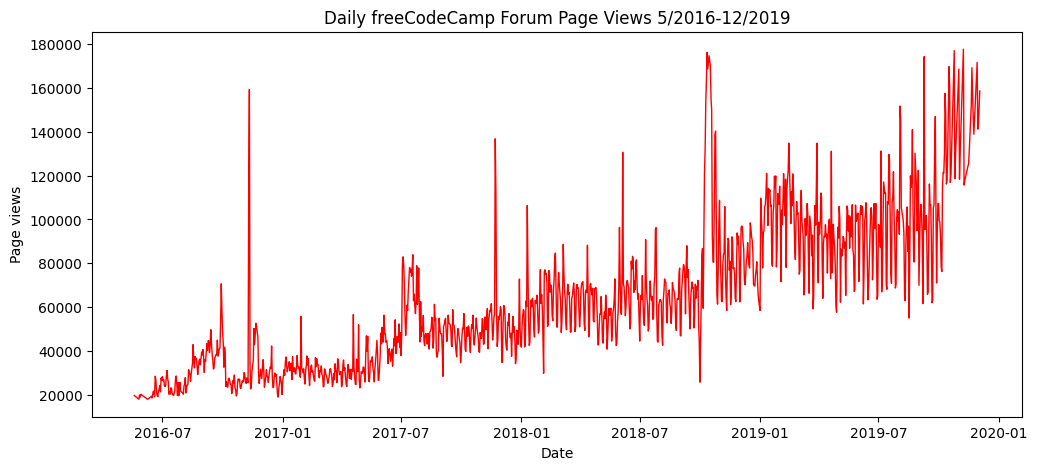

In [8]:
draw_line_plot()

In [9]:
def draw_line_plot2(df, filename='line_plot.png'):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df['date'], df['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page views')
    #ax.grid(True)
    
    # Enregistrer le graphique
    fig.savefig(filename)
    
    # Afficher le graphique
    plt.show()

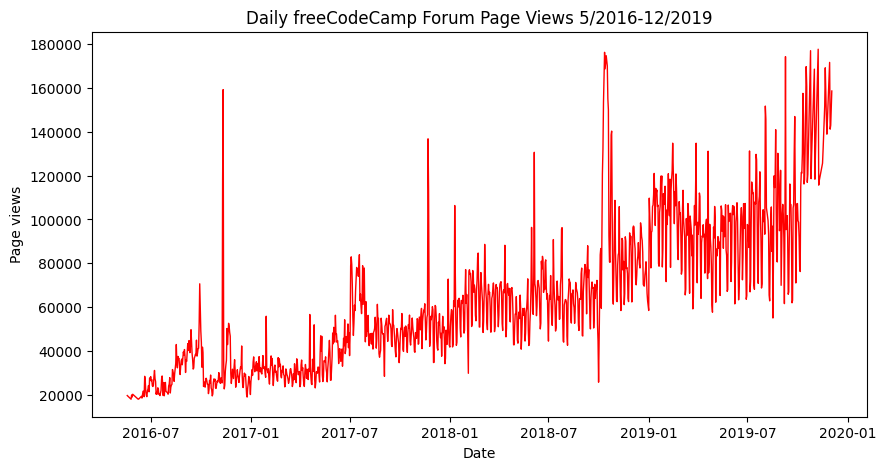

In [10]:
draw_line_plot2(df, 'line_plot.png')

In [11]:
def draw_bar_plot():    
    
    # Copier et modifier les données pour le graphique à barres mensuel
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Créer la figure et les axes
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Dessiner le graphique à barres
    df_bar.plot(kind='bar', ax=ax)
    
    # Définir le titre et les étiquettes
    ax.set_title('Average Daily Page Views per Month')
    ax.set_xlabel('Years')
    ax.set_ylabel('Page Views')
    
    # Définir le titre de la légende
    ax.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Enregistrer l'image et retourner la figure (ne pas changer cette partie)
    fig.savefig('bar_plot.png')
    return fig

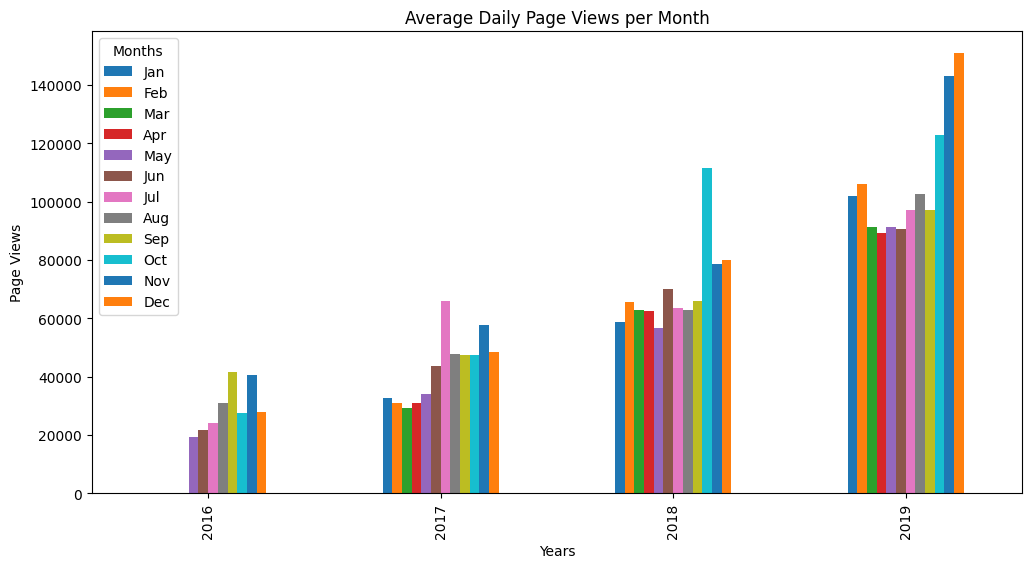

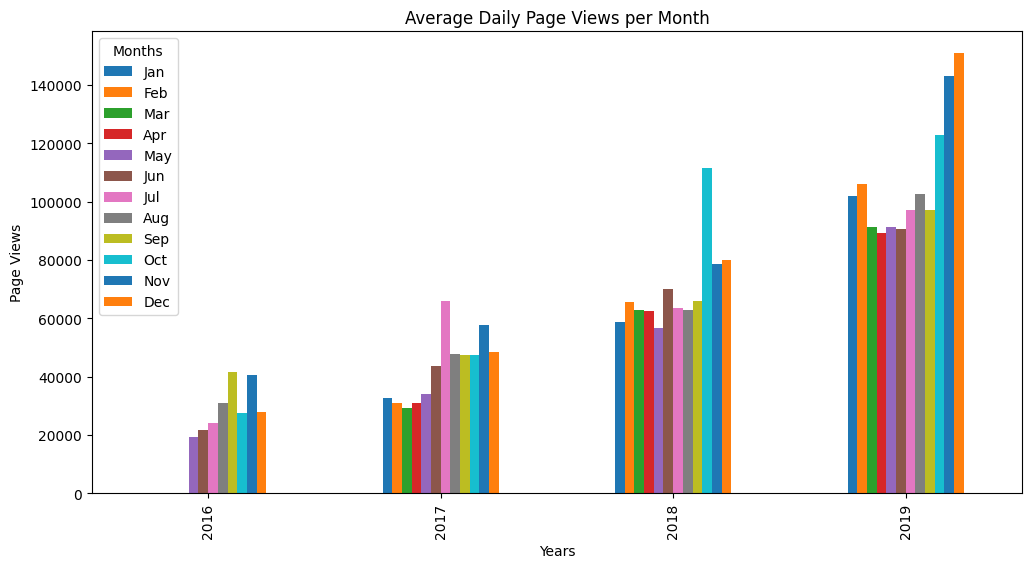

In [12]:
draw_bar_plot()

In [13]:
def draw_box_plots(df):
    # Convertir la colonne des dates en datetime si ce n'est pas déjà fait
    df['date'] = pd.to_datetime(df['date'])
    
    # Extraire l'année et le mois de la date
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month_name().str[:3]
    
    # Configurer la figure matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Boîte à moustaches par année (Tendance)
    sns.boxplot(x='year', y='value', data=df, ax=axes[0], palette='Set3')
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    # Boîte à moustaches par mois (Saisonnalité)
    sns.boxplot(x='month', y='value', data=df, ax=axes[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette='Set3')
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    
    # Afficher le graphique
    plt.tight_layout()
    plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_8040\2211281211.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df, ax=axes[0], palette='Set3')
C:\Users\peter\AppData\Local\Temp\ipykernel_8040\2211281211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df, ax=axes[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette='Set3')


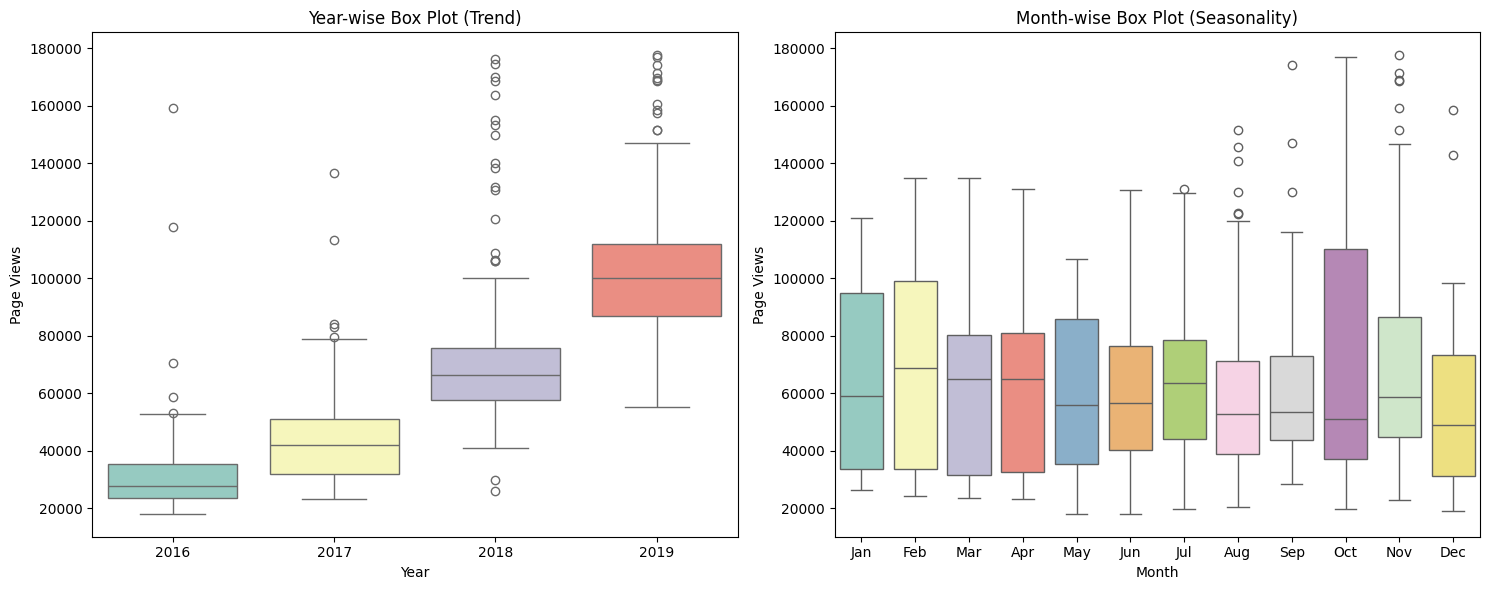

In [14]:
draw_box_plots(df)

In [42]:
df.set_index(df['date'], inplace=True)

In [43]:
df.drop(columns='date', inplace=True)

In [ ]:
df['value'] = df['value'].resample('M').sum()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [51]:
df = df.dropna()

<Axes: xlabel='date'>

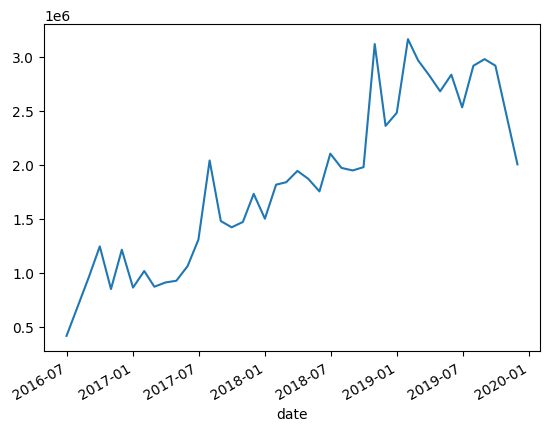

In [58]:
df['value'].plot()

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

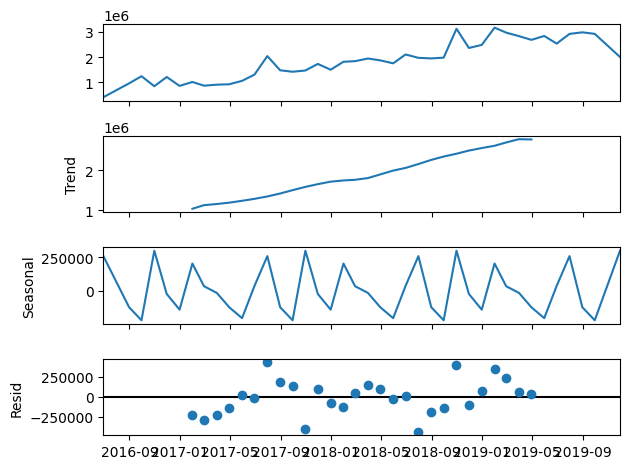

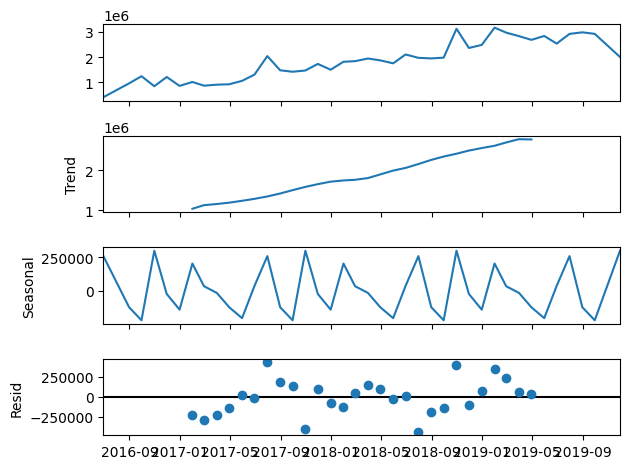

In [60]:
decompostion = seasonal_decompose(df, model='additive', period=12)
decompostion.plot()

In [62]:
stationnary = adfuller(df)
stationnary

(-1.023366747763559,
 0.7446467069047483,
 3,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 828.1372727901596)

<Axes: xlabel='date'>

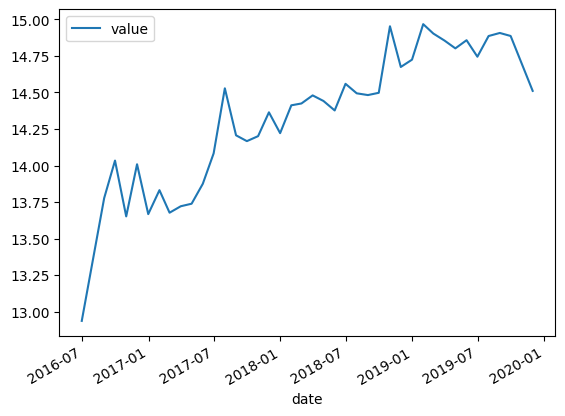

In [64]:
df_log = np.log(df)
df_log.plot()

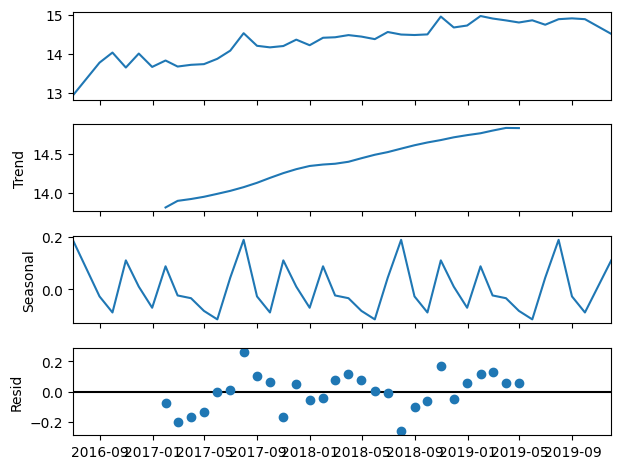

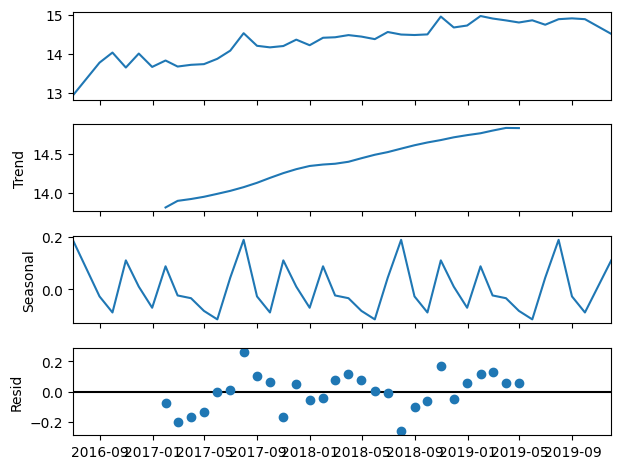

In [65]:
decompostion = seasonal_decompose(df_log, model='additive', period=12)
decompostion.plot()

In [67]:
stationnary = adfuller(df_log)
stationnary

(-1.425043755542081,
 0.5702126963404395,
 3,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 -19.199672368997064)

In [68]:
df_dff = df.diff().dropna()
df_dff

,value
date,
2016-08-31,546898.0
2016-09-30,281781.0
2016-10-31,-394958.0
2016-11-30,364111.0
2016-12-31,-350654.0
2017-01-31,153535.0
2017-02-28,-145174.0
2017-03-31,39276.0
2017-04-30,15920.0


<Axes: xlabel='date'>

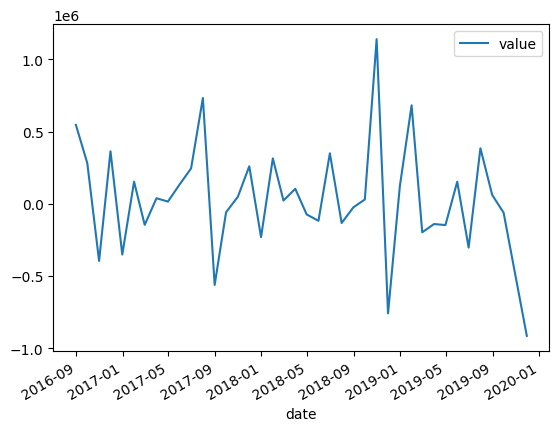

In [69]:
df_dff.plot()

In [70]:
stationnary = adfuller(df_dff)
stationnary

(-4.811564343289417,
 5.168228845275552e-05,
 2,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 802.5296002546881)

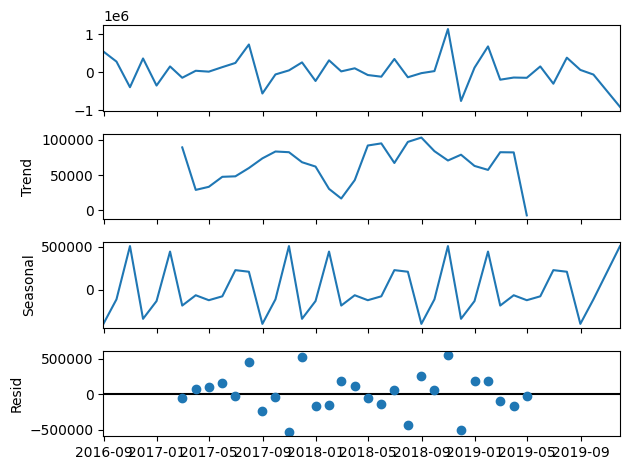

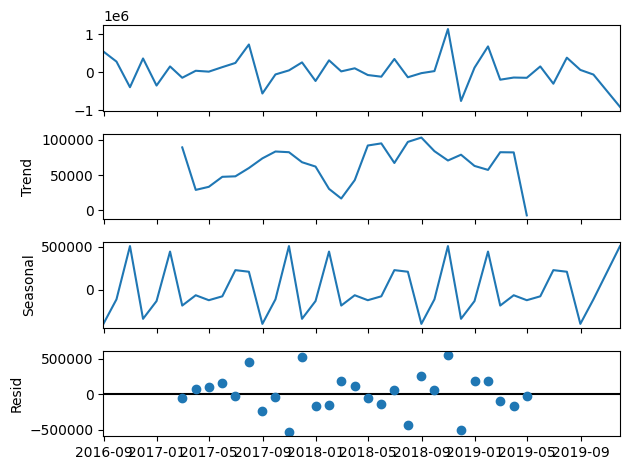

In [71]:
decompostion = seasonal_decompose(df_dff, model='additive', period=12)
decompostion.plot()

In [126]:
train, test = df_dff[:26], df_dff[26:]

In [127]:
test

,value
date,
2018-10-31,1140336.0
2018-11-30,-757938.0
2018-12-31,120822.0
2019-01-31,682280.0
2019-02-28,-196638.0
2019-03-31,-139465.0
2019-04-30,-146596.0
2019-05-31,153584.0
2019-06-30,-302439.0


In [128]:
import pmdarima as pm
model = pm.auto_arima(train, seasonal=True, m=12, start_p=0, start_q=0, max_p=3, max_q=3, start_P=0, start_Q=0, max_P=2, max_Q=2, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=389.274, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=375.121, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=368.744, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=373.137, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=369.525, Time=0.08 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=369.759, Time=0.09 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=367.598, Time=0.04 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=369.523, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=371.523, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=377.637, Time=0.03 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=370.021, Time=0.05 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=376.488, Time=0.05 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=378.134, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=369.964, Time=0.06 sec

Best model:  ARIMA(0,1,1)(1,1,0)

In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(0,1,1), seasonal_order=(1,1,0,12))    
model_fit = model.fit(disp=False)

c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [130]:
steps = len(test) 
forecast = model_fit.get_forecast(steps=steps) 
predictions = forecast.predicted_mean.cumsum()

In [131]:
confidence_intervals = forecast.conf_int().cumsum()
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]           

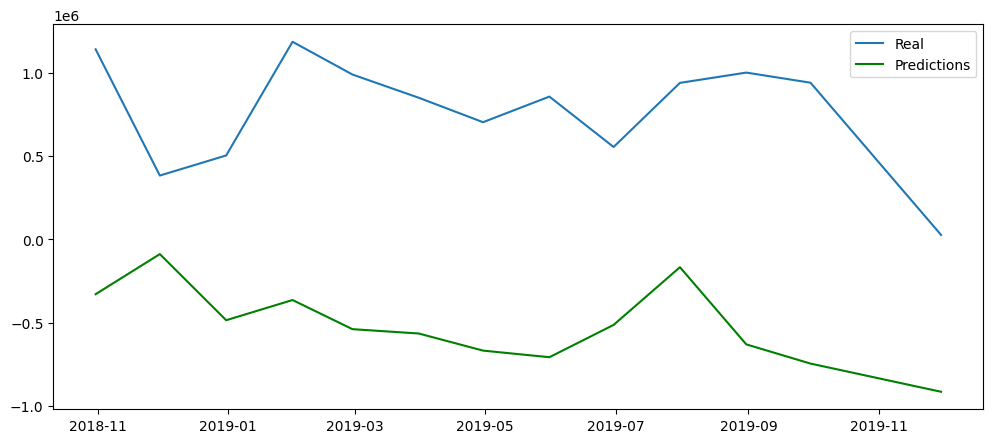

In [132]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.cumsum(), label='Real')
plt.plot(test.index, predictions, c='green', label='Predictions')
#plt.plot(test.index, upper_limits, c='red', ls='--', lw=0.5, label='Confidence intervals')
#plt.plot(test.index, lower_limits, c='red', ls='--', lw=0.5, label='Confidence intervals')
plt.legend()

In [133]:
predictions.index = test.index
values = pd.DataFrame({'Actual': test['value'].cumsum(), 'Predictions': predictions})
values

,Actual,Predictions
date,,
2018-10-31,1140336.0,-329586.125754
2018-11-30,382398.0,-89085.342126
2018-12-31,503220.0,-485983.266892
2019-01-31,1185500.0,-364631.958331
2019-02-28,988862.0,-539646.679943
2019-03-31,849397.0,-565731.555337
2019-04-30,702801.0,-668330.218555
2019-05-31,856385.0,-707990.910648
2019-06-30,553946.0,-514117.276028


In [134]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
         
rmse = np.sqrt(mean_squared_error(test, predictions)) 
r_squared = r2_score(test, predictions) 
mae = mean_absolute_error(test, predictions) 
mse = mean_squared_error(test, predictions) 
print(f'RMSE: {rmse}') 
print(f'R²: {r_squared}') 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')
print(f'BIC: {model_fit.bic}')
print(f'AIC: {model_fit.aic}')

RMSE: 717150.321413734
R²: -0.8886315306668853
MAE: 622244.3970071011
MSE: 514304583503.82196
BIC: 369.292754489683
AIC: 367.59790641729836
